In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from classifier_selector import Classifier_selector
from sbs import SequentialBackwardSelection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mpa import mpa
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import os
os.environ["PYTHONWARNINGS"] = "ignore::UserWarning"


In [2]:
''' Testing phase '''

' Testing phase '

In [3]:
classifier_selecting = Classifier_selector()

In [4]:
wpbc_df = pd.read_csv("./Datasets/wpbc.csv",header = None)
num_features = wpbc_df.shape[1] - 1
feature_names = [f'feature{i+1}' for i in range(num_features)] + ['label']
wpbc_df.columns = feature_names
dict1 = {'N':0,'R':1}
wpbc_df = wpbc_df.replace({'label':dict1})
wpbc_df['label'] = wpbc_df['label'].apply(pd.to_numeric, errors = 'coerce')
wpbc_df.drop(columns = "feature1", inplace = True)
wpbc_df.replace("?", np.nan, inplace = True)
wpbc_df['feature34'] = pd.to_numeric(wpbc_df['feature34'], errors='coerce')
wpbc_df.isnull().sum()

/tmp/ipykernel_4973/3369807844.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wpbc_df = wpbc_df.replace({'label':dict1})


feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    4
label        0
dtype: int64

In [5]:
wpbc_df.head()

,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,...,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.1,0
1,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0,0
2,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,...,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0,0
3,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0,0
4,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0,1


In [6]:
def fill_nan_by_group(df, group_column, columns_to_fill=None):
    df_filled = df.copy()

    # If no columns specified, get all numeric columns except the group column
    if columns_to_fill is None:
        columns_to_fill = df.select_dtypes(include=[np.number]).columns
        columns_to_fill = columns_to_fill[columns_to_fill != group_column]

    # Fill each column separately
    for column in columns_to_fill:
        # Calculate means for each group for the current column
        group_means = df.groupby(group_column)[column].mean()

        # For each unique group, fill NaN values with that group's mean
        for group_value in df[group_column].unique():
            mask = (df[group_column] == group_value) & (df[column].isna())
            df_filled.loc[mask, column] = group_means[group_value]

    return df_filled
wpbc_df = fill_nan_by_group(wpbc_df, "label")
wpbc_df = shuffle(wpbc_df, random_state = 77)

/tmp/ipykernel_4973/419185410.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '53.47019867549669' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_filled.loc[mask, column] = group_means[group_value]


In [7]:
wpbc_df.isnull().sum()

feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [8]:
train_df, test_df = train_test_split(wpbc_df, test_size = 0.2, random_state=65)
X_train = train_df.drop("label", axis = 1)
y_train = train_df["label"]
X_test = test_df.drop("label", axis = 1)
y_test = test_df["label"]

n_jobs = -1
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

Best Cross-validation Score: 0.46461538461538465

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        31
           1       0.17      0.11      0.13         9

    accuracy                           0.68        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.63      0.68      0.65        40



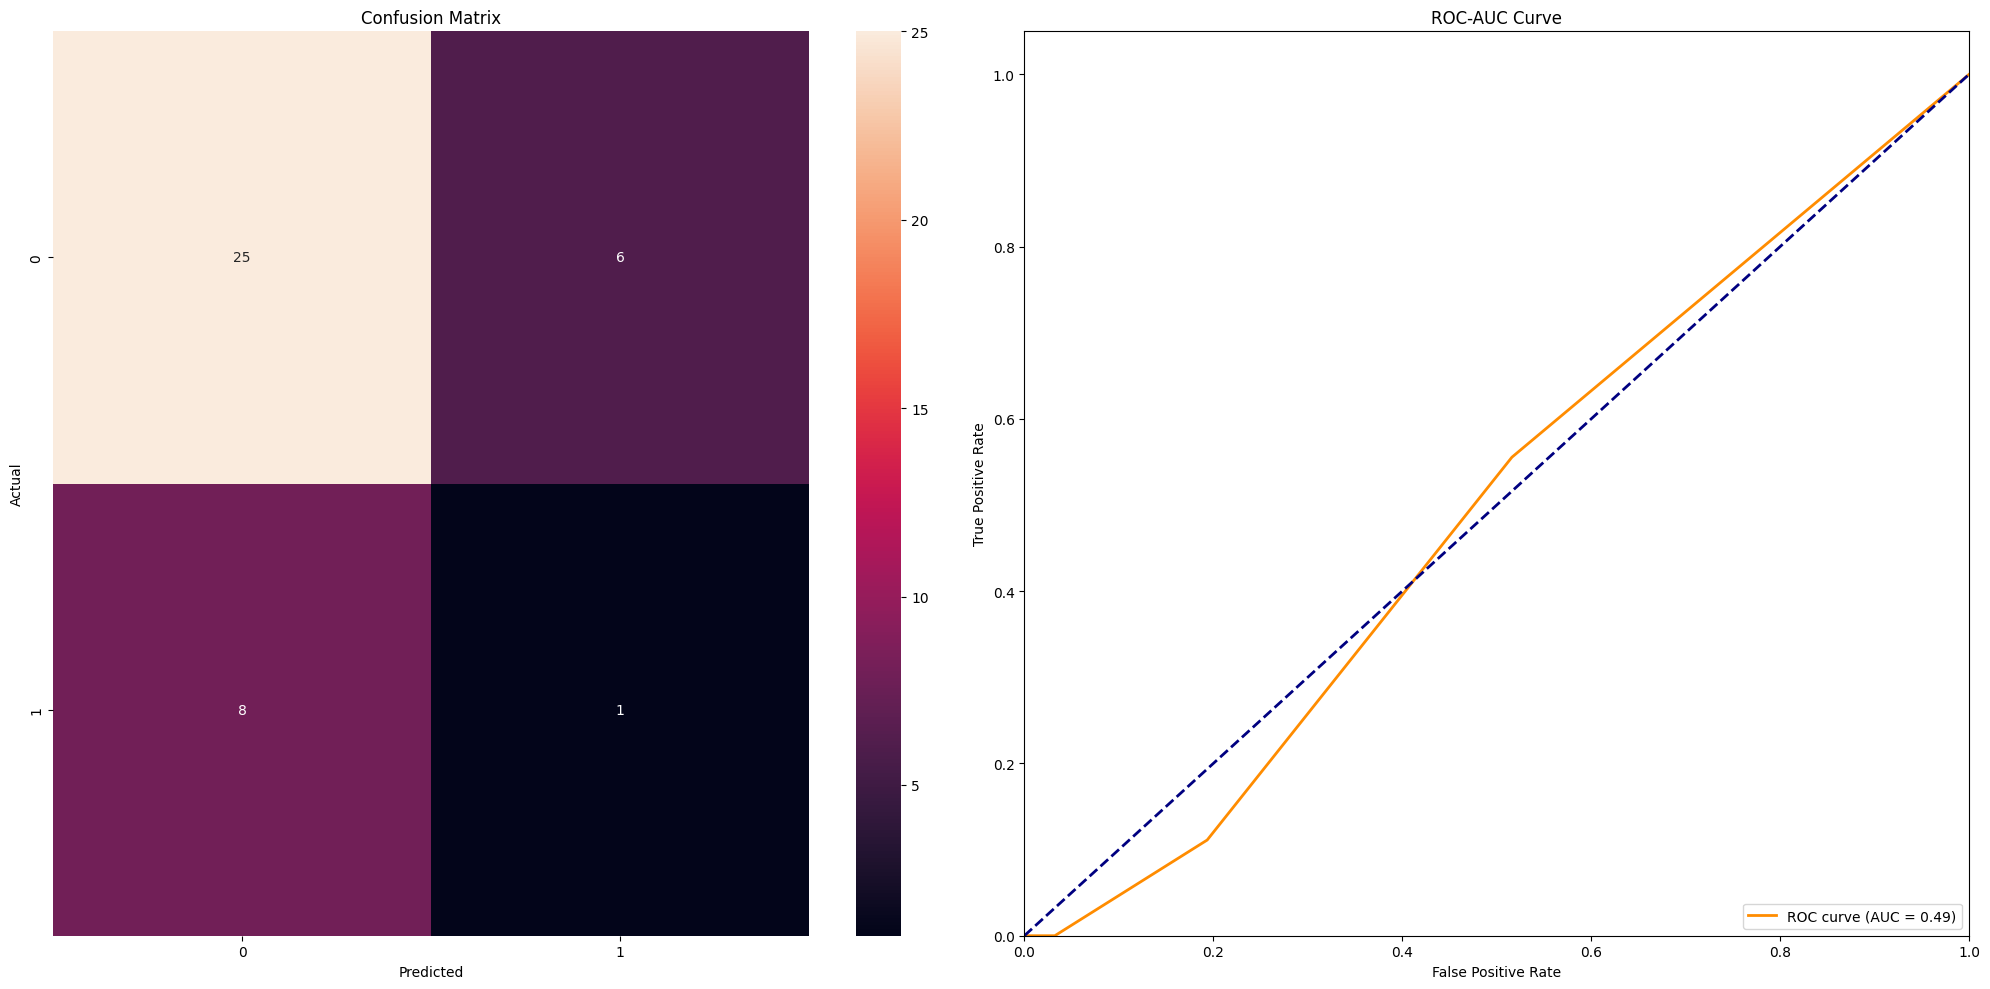

In [9]:
results_knn, scaler = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'knn')

print("\nBest Parameters:", results_knn['best_parameters'])
print("\nBest Cross-validation Score:", results_knn['best_score'])
print("\nFeature Importances:", results_knn['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_knn['best_model'].predict(
    scaler.fit_transform(X_test))))

In [10]:
knn = KNeighborsClassifier(**results_knn['best_parameters'])

sbs_knn = SequentialBackwardSelection(estimator=knn,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_knn.fit(X_train, X_test, y_train, y_test)


Removed feature: feature2
Current performance: 0.675
Remaining features: ['feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature3
Current performance: 0.675
Remaining features: ['feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature13
Current perfor

n_jobs = -1
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/soulangel443/.local/share/mise/installs/python/latest/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters: {'validation_fraction': 0.1, 'tol': 0.001, 'penalty': 'l2', 'max_iter': 500, 'early_stopping': True, 'alpha': 0.001}

Best Cross-validation Score: 0.5982012872038447

Feature Importances: {'feature2': 13.176163469028337, 'feature3': 0.1977205654717977, 'feature4': 0.6264743665084603, 'feature5': 1.18394942184792, 'feature6': 1.4226272663842983, 'feature7': 3.5557340935959076, 'feature8': 2.492673258630258, 'feature9': 0.1337574806043508, 'feature10': 2.848669267914662, 'feature11': 4.479532756204416, 'feature12': 4.505646532525076, 'feature13': 4.789994006629988, 'feature14': 4.443853462203268, 'feature15': 3.9650544940667443, 'feature16': 8.661512308087785, 'feature17': 4.670402910796398, 'feature18': 8.260044391054606, 'feature19': 5.149779465035055, 'feature20': 2.1165853754666655, 'feature21': 5.429588067902772, 'feature22': 6.540747861317627, 'feature23': 4.392026118429699, 'feature24': 1.7986079677045594, 'feature25': 5.420155016025608, 'feature26': 1.0269320011

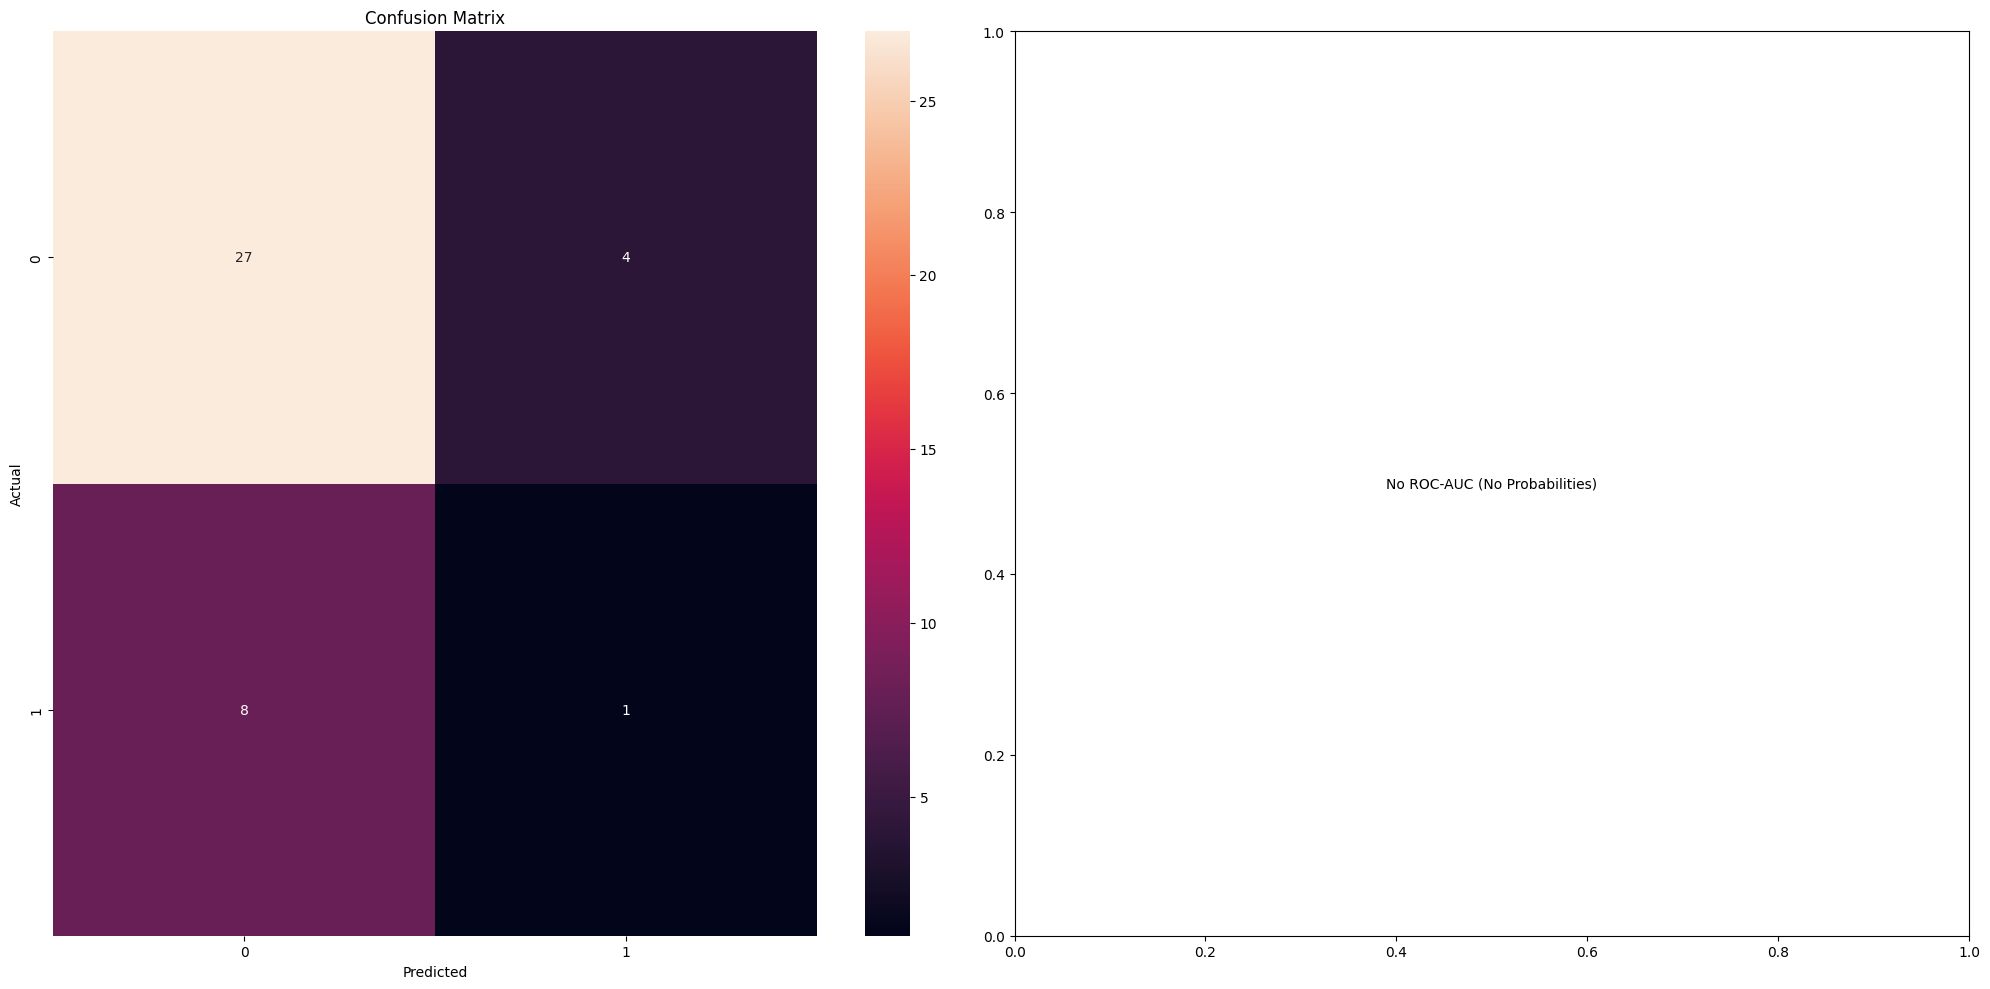

In [11]:
results_perceptron, scaler = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'perceptron')

print("\nBest Parameters:", results_perceptron['best_parameters'])
print("\nBest Cross-validation Score:", results_perceptron['best_score'])
print("\nFeature Importances:", results_perceptron['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_perceptron['best_model'].predict(
    scaler.fit_transform(X_test))))

In [12]:
perceptron = Perceptron(**results_perceptron['best_parameters'])

sbs_perceptron = SequentialBackwardSelection(estimator=perceptron,
                                             min_features = 3,
                                             scoring_metric=accuracy_score,
                                             scale_features=True,
                                             verbose=True)
sbs_perceptron.fit(X_train, X_test, y_train, y_test)


Removed feature: feature32
Current performance: 0.825
Remaining features: ['feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature33', 'feature34']


Removed feature: feature8
Current performance: 0.8
Remaining features: ['feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature33', 'feature34']


Removed feature: feature7
Current performanc

n_jobs = -1
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}

Best Cross-validation Score: 0.5870129870129871

Feature Importances: {'feature2': 0.11202330671998299, 'feature3': 0.025398651981375555, 'feature4': 0.03214648362251004, 'feature5': 0.02481845559335266, 'feature6': 0.034694252630238245, 'feature7': 0.02639808059483167, 'feature8': 0.024242552023769123, 'feature9': 0.014821776274145096, 'feature10': 0.020564696300312817, 'feature11': 0.019884973004787147, 'feature12': 0.0370365549300153, 'feature13': 0.03144628827701809, 'feature14': 0.03702426123684652, 'feature15': 0.03806023683775444, 'feature16': 0.03366721431748287, 'feature17': 0.014688469450764574, 'feature18': 0.01771695358253639, 'feature19': 0.023485617418933714, 'feature20': 0.033301284871282325, 'feature21'

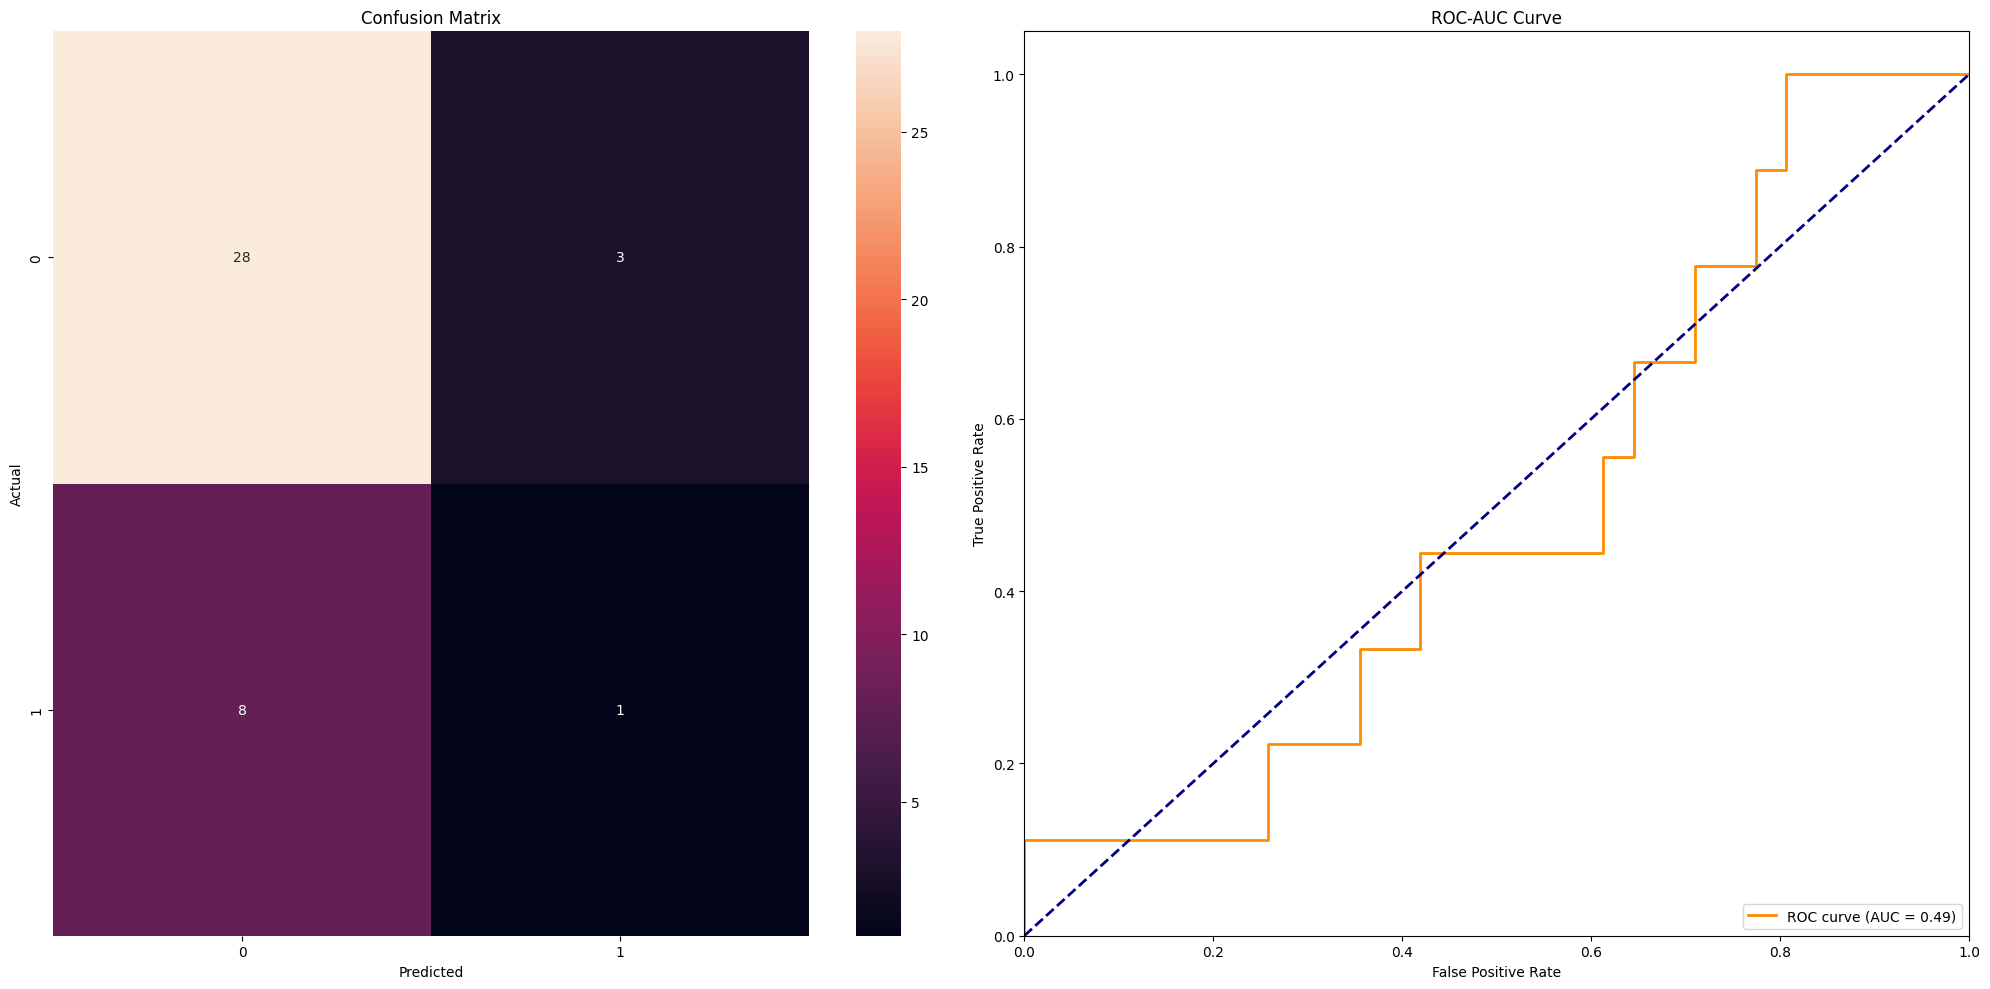

In [13]:
results_rf, scaler = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'rf')

print("\nBest Parameters:", results_rf['best_parameters'])
print("\nBest Cross-validation Score:", results_rf['best_score'])
print("\nFeature Importances:", results_rf['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_rf['best_model'].predict(
    scaler.fit_transform(X_test))))

In [14]:
rf = RandomForestClassifier(**results_rf['best_parameters'])

sbs_rf = SequentialBackwardSelection(estimator=rf,
                                     min_features = 3,
                                     scoring_metric=accuracy_score,
                                     scale_features=True,
                                     verbose=True)
sbs_rf.fit(X_train, X_test, y_train, y_test)


Removed feature: feature7
Current performance: 0.775
Remaining features: ['feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature5
Current performance: 0.775
Remaining features: ['feature2', 'feature3', 'feature4', 'feature6', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature3
Current perform

n_jobs = -1
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'splitter': 'random', 'min_samples_split': 20, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.01, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced'}

Best Cross-validation Score: 0.5191438191438191

Feature Importances: {'feature2': 0.0, 'feature3': 0.11760036652727843, 'feature4': 0.12449295810124418, 'feature5': 0.19073306323478562, 'feature6': 0.0, 'feature7': 0.0, 'feature8': 0.0, 'feature9': 0.0, 'feature10': 0.0, 'feature11': 0.0, 'feature12': 0.0, 'feature13': 0.0, 'feature14': 0.0, 'feature15': 0.0, 'feature16': 0.0, 'feature17': 0.0, 'feature18': 0.0, 'feature19': 0.0, 'feature20': 0.0, 'feature21': 0.0, 'feature22': 0.0, 'feature23': 0.0, 'feature24': 0.0, 'feature25': 0.21443622862882625, 'feature26': 0.0, 'feature27': 0.0, 'feature28': 0.0, 'feature29': 0.09607453017258809, 'feature30': 0.0, 'feature31': 0.0, 'feature32': 0.0, 'feature33

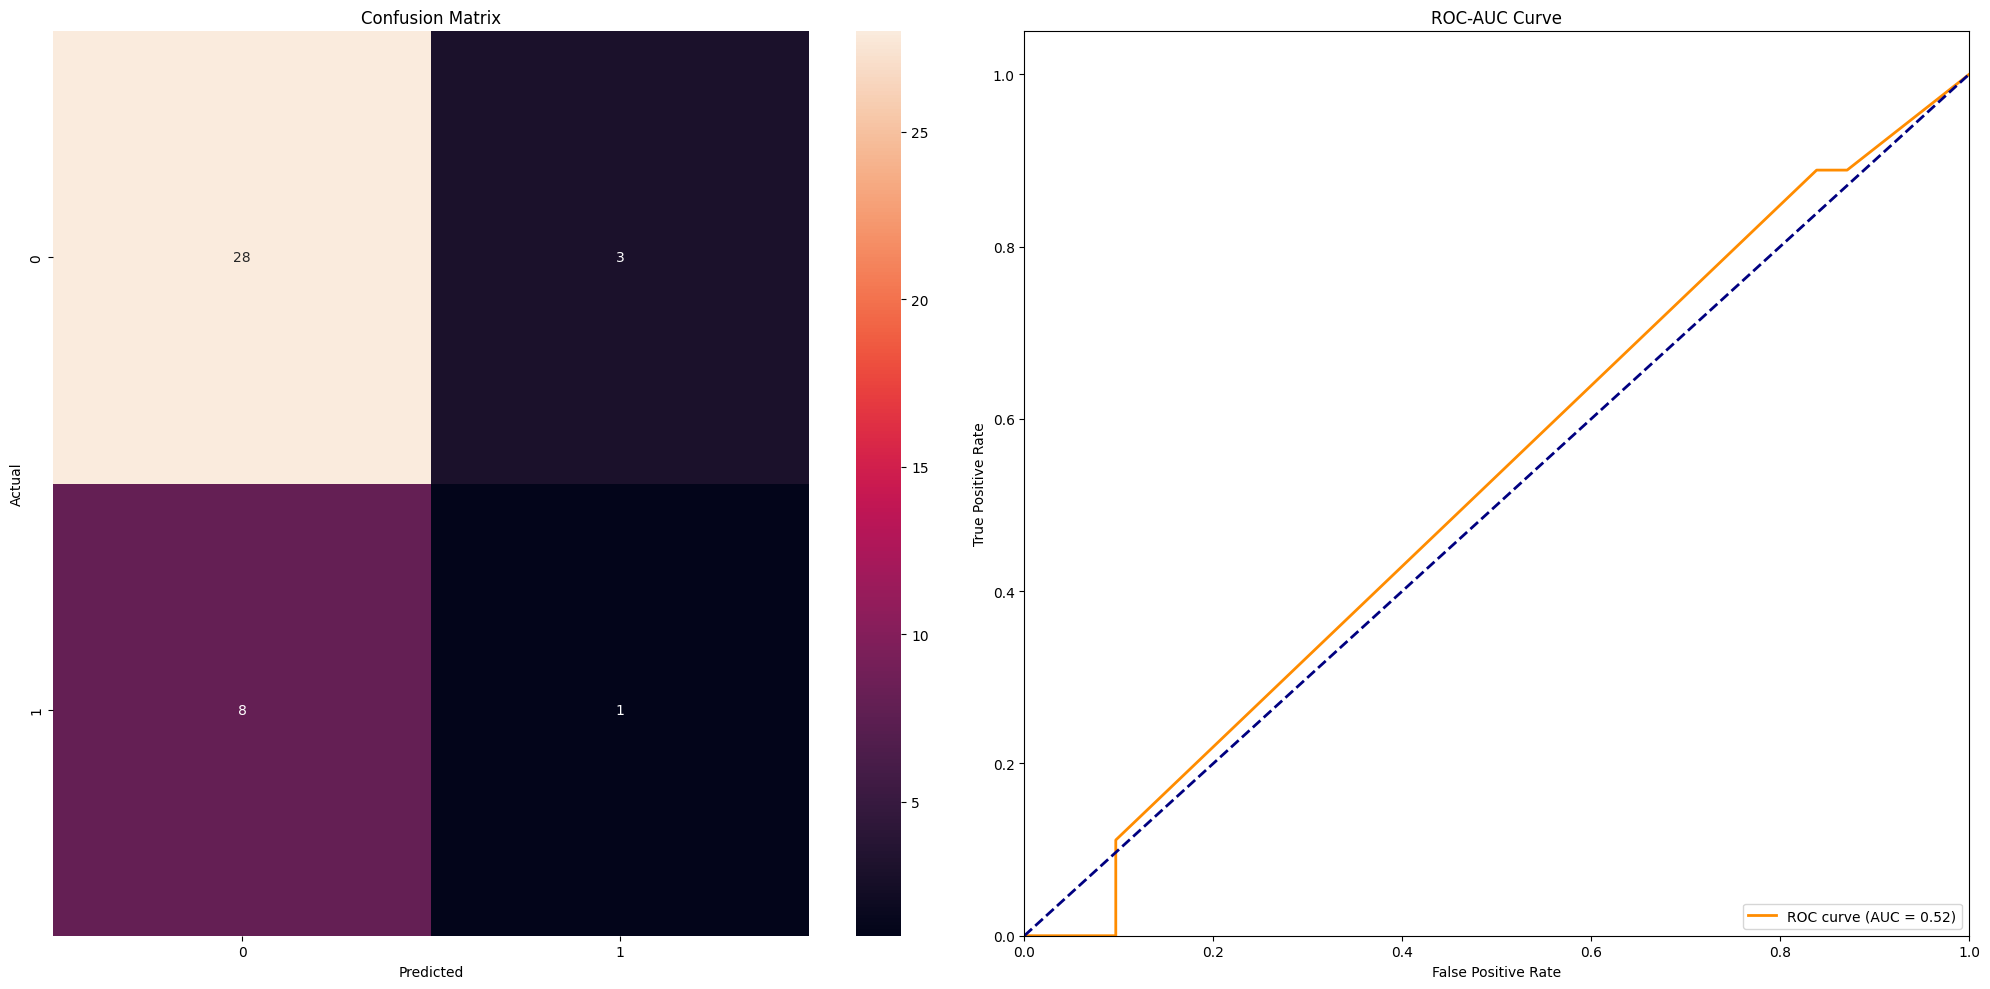

In [15]:
results_dt, scaler = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'dt')

print("\nBest Parameters:", results_dt['best_parameters'])
print("\nBest Cross-validation Score:", results_dt['best_score'])
print("\nFeature Importances:", results_dt['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_dt['best_model'].predict(
    scaler.fit_transform(X_test))))

In [16]:
dt = DecisionTreeClassifier(**results_dt['best_parameters'])

sbs_dt = SequentialBackwardSelection(estimator=dt,
                                     min_features = 3,
                                     scoring_metric=accuracy_score,
                                     scale_features=True,
                                     verbose=True)
sbs_dt.fit(X_train, X_test, y_train, y_test)


Removed feature: feature17
Current performance: 0.775
Remaining features: ['feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature28
Current performance: 0.75
Remaining features: ['feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature4
Current performan

n_jobs = -1
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'kernel': 'rbf', 'gamma': 0.001, 'degree': 2, 'coef0': 0.5, 'class_weight': None, 'C': 100}

Best Cross-validation Score: 0.6045487845487846

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        31
           1       0.14      0.11      0.12         9

    accuracy                           0.65        40
   macro avg       0.45      0.46      0.45        40
weighted avg       0.62      0.65      0.63        40



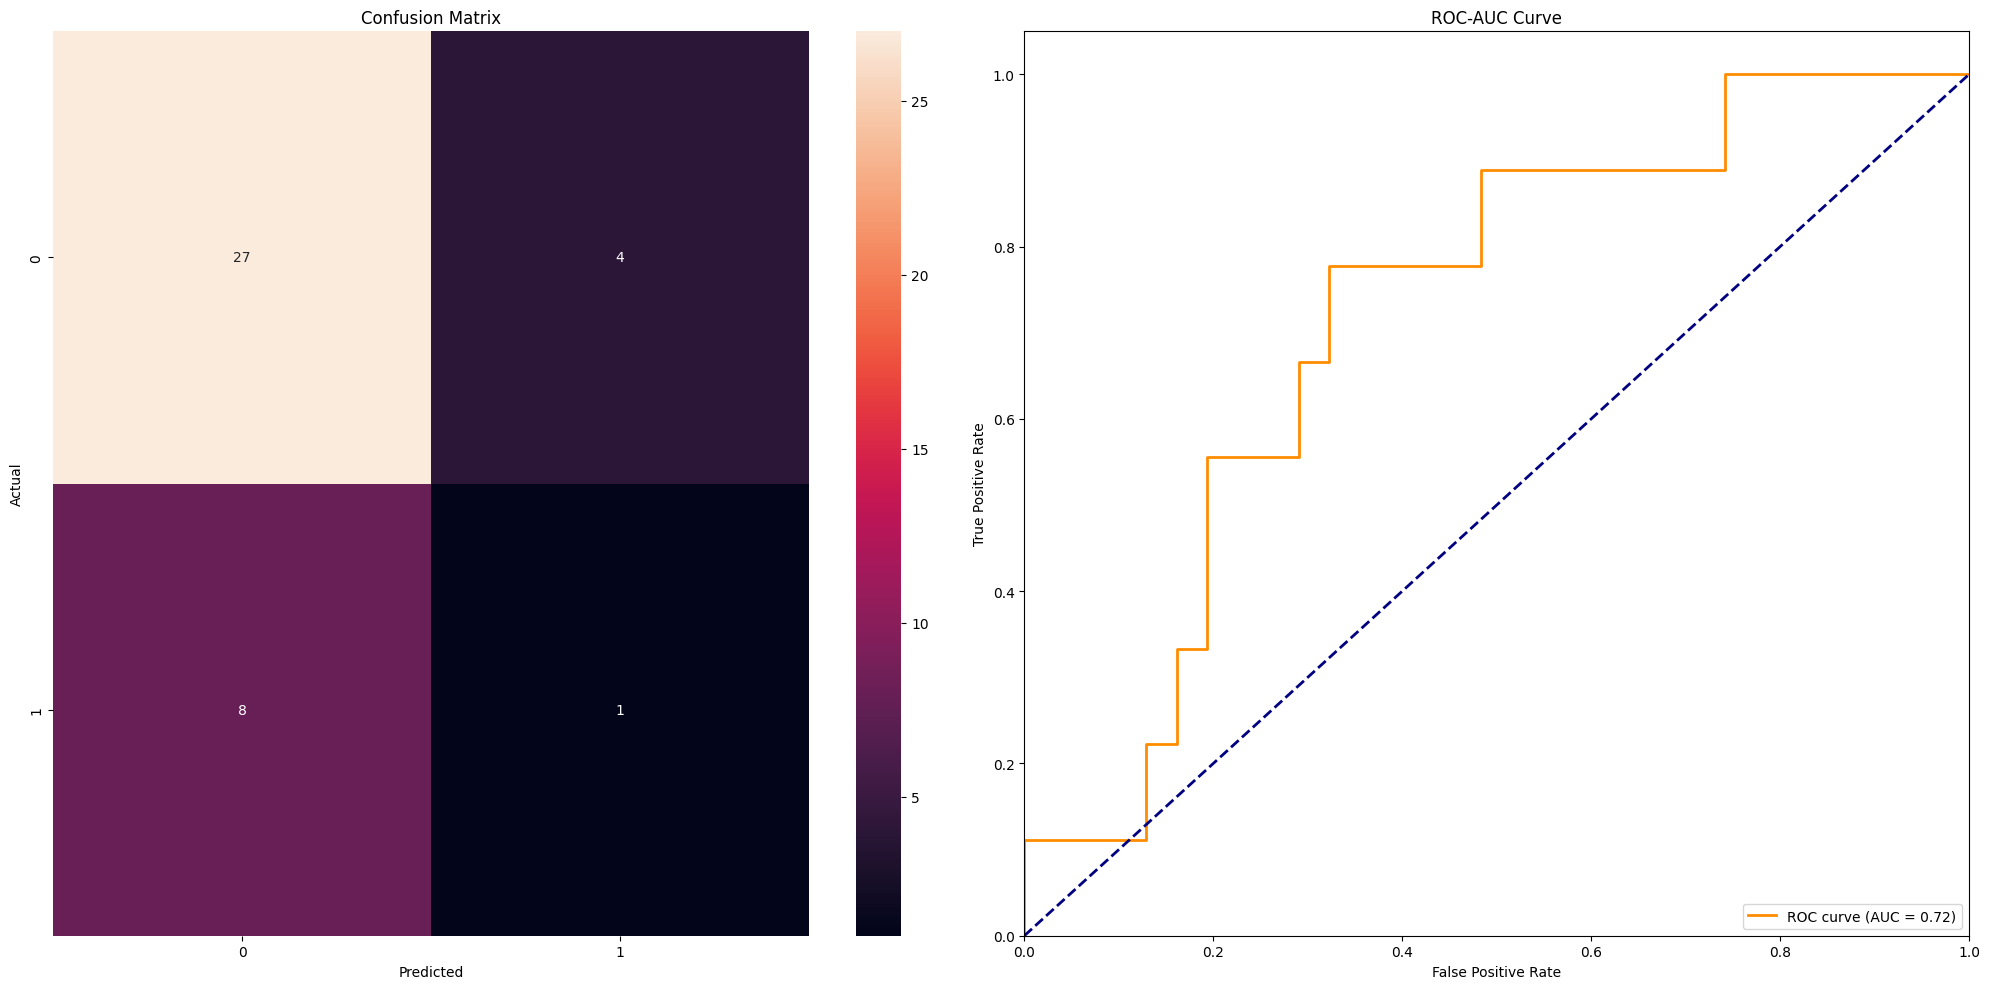

In [17]:
results_svm, scaler = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'svm')

print("\nBest Parameters:", results_svm['best_parameters'])
print("\nBest Cross-validation Score:", results_svm['best_score'])
print("\nFeature Importances:", results_svm['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_svm['best_model'].predict(
    scaler.fit_transform(X_test))))

In [18]:
svm = SVC(**results_svm['best_parameters'])

sbs_svm = SequentialBackwardSelection(estimator=svm,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_svm.fit(X_train, X_test, y_train, y_test)


Removed feature: feature34
Current performance: 0.75
Remaining features: ['feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33']


Removed feature: feature21
Current performance: 0.8
Remaining features: ['feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33']


Removed feature: feature3
Current performance

In [19]:
import numpy as np
import torch
from torch import nn
from torch.optim import Adam
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt


In [20]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class OptimizedBSpline(nn.Module):
    """Optimized B-spline with iterative De Boor algorithm"""
    def __init__(self, knots, degree=3):
        super().__init__()
        self.knots = knots
        self.degree = degree
        self.n_knots = len(knots)

    def _find_interval(self, t):
        """Find the knot interval index for each t value"""
        # Clamp t to valid range and find interval using searchsorted
        t_clamped = torch.clamp(t, self.knots[self.degree], self.knots[self.n_knots - self.degree - 1])
        i = torch.searchsorted(self.knots, t_clamped, right=True) - 1
        # Ensure i stays within valid bounds for degree-k spline
        return torch.clamp(i, self.degree, self.n_knots - self.degree - 1)

    def forward(self, t, control_points):
        """Iterative De Boor algorithm for B-spline evaluation"""
        batch_size = t.shape[0]
        n_control = len(control_points)
        k = self.degree

        # Find knot interval for each t
        interval = self._find_interval(t)  # Shape: [batch_size]

        # Initialize temporary control points for each t
        d = torch.zeros(batch_size, k + 1, device=t.device, dtype=t.dtype)
        for j in range(k + 1):
            idx = torch.clamp(interval - k + j, 0, n_control - 1)
            d[:, j] = control_points[idx]

        # Iterative De Boor computation
        for r in range(1, k + 1):
            for j in range(k, r - 1, -1):
                left_knot = self.knots[interval - k + j]
                right_knot = self.knots[interval - k + j + r]
                alpha = (t - left_knot) / (right_knot - left_knot + 1e-8)  # Add epsilon for stability
                d[:, j] = (1 - alpha) * d[:, j - 1] + alpha * d[:, j]

        return d[:, k]  # Final value for each t

class OptimizedTorchCubicSpline(nn.Module):
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = nn.Parameter(y)
        n = len(x)
        self.register_buffer('knots', torch.cat([x[0].repeat(3), x[1:-1], x[-1].repeat(3)]))
        self.bspline = OptimizedBSpline(self.knots, degree=3)
        self.x_min = x[0]
        self.x_max = x[-1]

    def forward(self, t):
        return self.bspline(torch.clamp(t, self.x_min, self.x_max), self.y)

class OptimizedDifferentiablePchip(nn.Module):
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = nn.Parameter(y)
        self.n = len(x) - 1

    def _compute_derivatives(self, y):
        dy = y[1:] - y[:-1]
        dx = self.x[1:] - self.x[:-1]
        slopes = dy / dx
        d = torch.zeros_like(y)
        for i in range(1, len(y)-1):
            if slopes[i-1] * slopes[i] > 0:
                w1 = 2*dx[i] + dx[i-1]
                w2 = dx[i] + 2*dx[i-1]
                d[i] = (w1 + w2) / (w1/slopes[i-1] + w2/slopes[i])
        d[0] = slopes[0]
        d[-1] = slopes[-1]
        return d

    def forward(self, t):
        idx = torch.clamp(torch.searchsorted(self.x, t) - 1, 0, self.n - 1)
        x0 = self.x[idx]
        x1 = self.x[idx + 1]
        y0 = self.y[idx]
        y1 = self.y[idx + 1]
        t_norm = (t - x0) / (x1 - x0)
        d = self._compute_derivatives(self.y)
        d0 = d[idx]
        d1 = d[idx + 1]
        t2 = t_norm * t_norm
        t3 = t2 * t_norm
        h00 = 2*t3 - 3*t2 + 1
        h10 = t3 - 2*t2 + t_norm
        h01 = -2*t3 + 3*t2
        h11 = t3 - t2
        dx_segment = x1 - x0
        return h00 * y0 + h10 * dx_segment * d0 + h01 * y1 + h11 * dx_segment * d1

class OptimizedPyTorchGradientSMPA(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.05, epochs=100, random_state=7, verbose=False,
                 lambda_reg=0.0001, patience=10, decay_factor=0.9, min_learning_rate=1e-6,
                 n_control_points=6, smoothing_factor=0.0001, spline_type='cubic',
                 device=None, track_history=False, optimizer_type='adam', scheduler_type='reduce_on_plateau'):
        self.learning_rate = learning_rate
        self.initial_learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state
        self.verbose = verbose
        self.lambda_reg = lambda_reg
        self.patience = patience
        self.decay_factor = decay_factor
        self.min_learning_rate = min_learning_rate
        self.n_control_points = n_control_points
        self.smoothing_factor = smoothing_factor
        self.spline_type = spline_type
        self.device = device if device is not None else ('cuda' if torch.cuda.is_available() else 'cpu')
        self.track_history = track_history
        self.optimizer_type = optimizer_type
        self.scheduler_type = scheduler_type

        if spline_type not in ['cubic', 'pchip']:
            raise ValueError("spline_type must be 'cubic' or 'pchip'")
        torch.manual_seed(random_state)
        np.random.seed(random_state)

    def _to_tensor(self, data, dtype=torch.float32):
        if isinstance(data, torch.Tensor):
            return data.to(self.device, dtype=dtype, non_blocking=True)
        return torch.tensor(data, dtype=dtype, device=self.device)

    def _calculate_class_means(self, X, y):
        mask_1 = y == 1
        self.m1 = torch.mean(X[mask_1], dim=0)
        self.m0 = torch.mean(X[~mask_1], dim=0)

    def _initialize_control_points(self, X):
        n_features = X.shape[1] - 1
        self.spline_models = nn.ModuleList()
        for i in range(n_features):
            x_min, x_max = X[:, i].min().item(), X[:, i].max().item()
            control_x = torch.linspace(x_min, x_max, self.n_control_points, device=self.device)
            y_min, y_max = X[:, -1].min().item(), X[:, -1].max().item()
            y_mid = (self.m0[-1] + self.m1[-1]) / 2
            y_range = y_max - y_min
            control_y = torch.empty(self.n_control_points, device=self.device).uniform_(
                y_mid - y_range * 0.05, y_mid + y_range * 0.05
            )
            if self.spline_type == 'cubic':
                spline = OptimizedTorchCubicSpline(control_x, control_y).to(self.device)
            else:
                spline = OptimizedDifferentiablePchip(control_x, control_y).to(self.device)
            self.spline_models.append(spline)
        self.initial_control_points = [(m.x.clone(), m.y.clone()) for m in self.spline_models]

    def _calculate_displacement(self, X):
        total_spline = sum(spline(X[:, i]) for i, spline in enumerate(self.spline_models))
        return X[:, -1] - total_spline

    def _update_pseudo_labels(self, X, y):
        m1_displacement = self._calculate_displacement(self.m1.unsqueeze(0))[0]
        self.class_1_pseudo = 1 if m1_displacement > 0 else -1
        self.class_0_pseudo = -self.class_1_pseudo
        return torch.where(y == 1, self.class_1_pseudo, self.class_0_pseudo)

    def _create_optimizer_and_scheduler(self):
        params = [p for spline in self.spline_models for p in spline.parameters()]
        if self.optimizer_type.lower() == 'adam':
            optimizer = torch.optim.Adam(params, lr=self.initial_learning_rate)
        else:
            optimizer = torch.optim.SGD(params, lr=self.initial_learning_rate)
        if self.scheduler_type.lower() == 'reduce_on_plateau':
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                optimizer, mode='min', factor=self.decay_factor,
                patience=self.patience, min_lr=self.min_learning_rate)
        elif self.scheduler_type.lower() == 'step':
            scheduler = torch.optim.lr_scheduler.StepLR(
                optimizer, step_size=self.patience, gamma=self.decay_factor
            )
        else:
            scheduler = None
        return optimizer, scheduler

    def fit(self, X, y):
        if not set(np.unique(y)).issubset({0, 1}):
            raise ValueError("Labels must be 0 and 1")
        if X.shape[1] < 2:
            raise ValueError("At least 2 features required")

        X_tensor = self._to_tensor(X)
        y_tensor = self._to_tensor(y, dtype=torch.long)

        with torch.no_grad():
            self._calculate_class_means(X_tensor, y_tensor)
            self._initialize_control_points(X_tensor)

        optimizer, scheduler = self._create_optimizer_and_scheduler()

        best_error = float('inf')
        best_control_ys = [spline.y.clone() for spline in self.spline_models]
        best_class_1_pseudo = None

        if self.track_history:
            self.error_history_ = []
            self.control_point_history = [self.initial_control_points]

        for epoch in range(self.epochs):
            pseudo_labels = self._update_pseudo_labels(X_tensor, y_tensor)
            displacements = self._calculate_displacement(X_tensor)

            errors = displacements * pseudo_labels <= 0
            error_count = errors.sum().item()

            if self.verbose and epoch % 5 == 0:
                current_lr = optimizer.param_groups[0]['lr']
                print(f"Epoch {epoch}: Errors = {error_count}, LR = {current_lr:.6f}")

            if error_count < best_error:
                best_error = error_count
                best_control_ys = [spline.y.clone() for spline in self.spline_models]
                best_class_1_pseudo = self.class_1_pseudo
                self.best_epoch = epoch
                if error_count == 0 and epoch > 10:
                    if self.verbose:
                        print(f"Perfect separation achieved at epoch {epoch}")
                    break

            if self.track_history:
                self.error_history_.append(error_count)
                self.control_point_history.append(
                    [(s.x.clone().cpu().numpy(), s.y.clone().detach().cpu().numpy())
                     for s in self.spline_models]
                )

            if error_count == 0:
                continue

            error_indices = torch.where(errors)[0]
            X_err = X_tensor[error_indices]
            y_err = y_tensor[error_indices]
            ti = torch.where(y_err == 1, 1, -1)

            spline_values = sum(spline(X_err[:, i]) for i, spline in enumerate(self.spline_models))
            loss = torch.mean(torch.relu(1.0 - ti * self.class_1_pseudo * (X_err[:, -1] - spline_values)))

            if self.lambda_reg > 0:
                smoothness_penalty = 0
                for spline in self.spline_models:
                    y_diff = spline.y[1:] - spline.y[:-1]
                    x_diff = spline.x[1:] - spline.x[:-1]
                    smoothness_penalty += torch.mean((y_diff / (x_diff + 1e-8))**2)
                loss += self.lambda_reg * smoothness_penalty

            optimizer.zero_grad(set_to_none=True)
            loss.backward()
            optimizer.step()

            if scheduler is None:
                if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                    scheduler.step(error_count)
                else:
                    scheduler.step()
                if optimizer.param_groups[0]['lr'] <= self.min_learning_rate:
                    if self.verbose:
                        print(f"Minimum learning rate reached at epoch {epoch}")
                    break

        for spline, best_y in zip(self.spline_models, best_control_ys):
            spline.y.data = best_y
        self.class_1_pseudo = best_class_1_pseudo
        return self

    def predict(self, X):
        X_tensor = self._to_tensor(X)
        displacements = self._calculate_displacement(X_tensor)
        predictions = torch.where(displacements > 0,
                                torch.tensor(1 if self.class_1_pseudo > 0 else 0, device=self.device),
                                torch.tensor(0 if self.class_1_pseudo > 0 else 1, device=self.device))
        return predictions.cpu().numpy()

    def predict_proba(self, X):
        X_tensor = self._to_tensor(X)
        displacements = self._calculate_displacement(X_tensor)
        raw_probs = 1 / (1 + torch.exp(-displacements * self.class_1_pseudo * 0.5))
        if self.class_1_pseudo > 0:
            probs = torch.column_stack([1 - raw_probs, raw_probs])
        else:
            probs = torch.column_stack([raw_probs, 1 - raw_probs])
        return probs.cpu().numpy()

    def plot_convergence(self, figsize=(10, 4)):
        if not self.track_history or not hasattr(self, 'error_history_'):
            print("Convergence plotting requires track_history=True and a fitted model.")
            return None

        fig, ax = plt.subplots(figsize=figsize)
        ax.plot(self.error_history_, 'b-', label='Errors')
        ax.set_title('Error Convergence')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Number of Errors')
        ax.grid(True)
        ax.legend()
        plt.tight_layout()
        return fig

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def reorder_least_correlated_feature(X, standardize=True, feature_order=None, scaler=None):
    """
    Reorder X based on correlation or a provided feature order, applying standardization if specified.

    Parameters:
    - X: numpy array or pandas DataFrame
    - standardize: bool
    - feature_order: list, optional order from training set (default: None, compute from X)
    - scaler: StandardScaler instance, optional for test set standardization (default: None)

    Returns:
    - X_reordered, feature_order, scaler (scaler is None if feature_order is provided and not used)
    """
    is_dataframe = isinstance(X, pd.DataFrame)
    if is_dataframe:
        column_names = X.columns
        X_np = X.to_numpy()
    else:
        X_np = np.asarray(X)

    if feature_order is None:
        # Training case: compute order and standardize
        if standardize:
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X_np)
        else:
            X_scaled = X_np.copy()

        corr_matrix = np.abs(np.corrcoef(X_scaled, rowvar=False))
        n_features = X_np.shape[1]
        avg_corr = (np.sum(corr_matrix, axis=1) - np.diag(corr_matrix)) / (n_features - 1)
        target_idx = np.argmin(avg_corr)
        feature_order = list(range(n_features))
        feature_order.pop(target_idx)
        feature_order.append(target_idx)

        if is_dataframe:
            X_reordered = pd.DataFrame(X_scaled[:, feature_order],
                                      columns=[column_names[i] for i in feature_order])
        else:
            X_reordered = X_scaled[:, feature_order]
    else:
        # Test case: use provided order and standardize with provided scaler if given
        if standardize and scaler is not None:
            X_scaled = scaler.transform(X_np)
            if is_dataframe:
                X_reordered = pd.DataFrame(X_scaled[:, feature_order],
                                         columns=[column_names[i] for i in feature_order])
            else:
                X_reordered = X_scaled[:, feature_order]
        else:
            # No standardization, just reorder
            if is_dataframe:
                X_reordered = X.iloc[:, feature_order]
            else:
                X_reordered = X_np[:, feature_order]
        scaler = None  # No new scaler created

    return X_reordered, feature_order, scaler

# Updated usage
X_train_reordered, feature_order, scaler = reorder_least_correlated_feature(X_train)
print(f"Train - Means: {X_train_reordered.mean(axis=0).round(2)}, "
      f"Stds: {X_train_reordered.std(axis=0).round(2)}")
X_test_reordered, _, _ = reorder_least_correlated_feature(X_test, feature_order=feature_order, scaler=scaler)
print(f"Test - Means: {X_test_reordered.mean(axis=0).round(2)}, "
      f"Stds: {X_test_reordered.std(axis=0).round(2)}")

Train - Means: feature2     0.0
feature3     0.0
feature4     0.0
feature5    -0.0
feature6    -0.0
feature7     0.0
feature8     0.0
feature9     0.0
feature10    0.0
feature11   -0.0
feature12   -0.0
feature13   -0.0
feature14    0.0
feature15   -0.0
feature16    0.0
feature17   -0.0
feature18   -0.0
feature19    0.0
feature20   -0.0
feature21    0.0
feature22   -0.0
feature23    0.0
feature24    0.0
feature25    0.0
feature26    0.0
feature27    0.0
feature28   -0.0
feature29    0.0
feature30   -0.0
feature31    0.0
feature32    0.0
feature33   -0.0
feature34    0.0
dtype: float64, Stds: feature2     1.0
feature3     1.0
feature4     1.0
feature5     1.0
feature6     1.0
feature7     1.0
feature8     1.0
feature9     1.0
feature10    1.0
feature11    1.0
feature12    1.0
feature13    1.0
feature14    1.0
feature15    1.0
feature16    1.0
feature17    1.0
feature18    1.0
feature19    1.0
feature20    1.0
feature21    1.0
feature22    1.0
feature23    1.0
feature24    1.0
feature25  

In [23]:
X_train_reordered = X_train_reordered.to_numpy()
X_test_reordered = X_test_reordered.to_numpy()

In [24]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [25]:
type(X_train_reordered)
type(y_train)

numpy.ndarray

/tmp/ipykernel_4973/810629333.py:83: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at ../aten/src/ATen/native/BucketizationUtils.h:32.)
  idx = torch.clamp(torch.searchsorted(self.x, t) - 1, 0, self.n - 1)


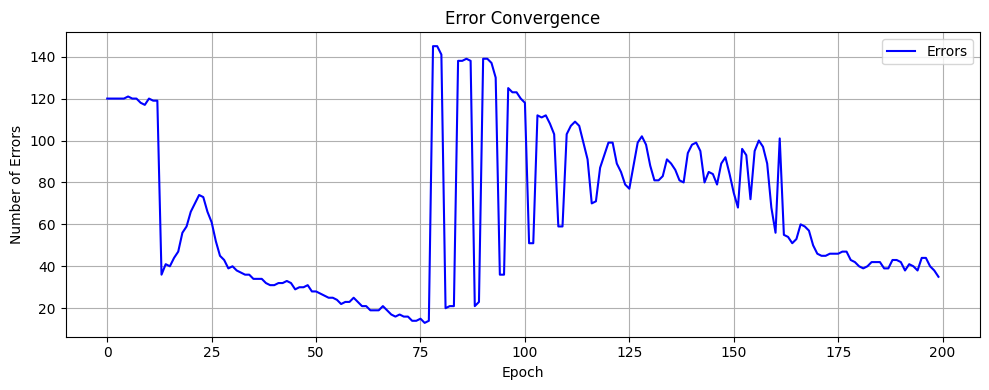

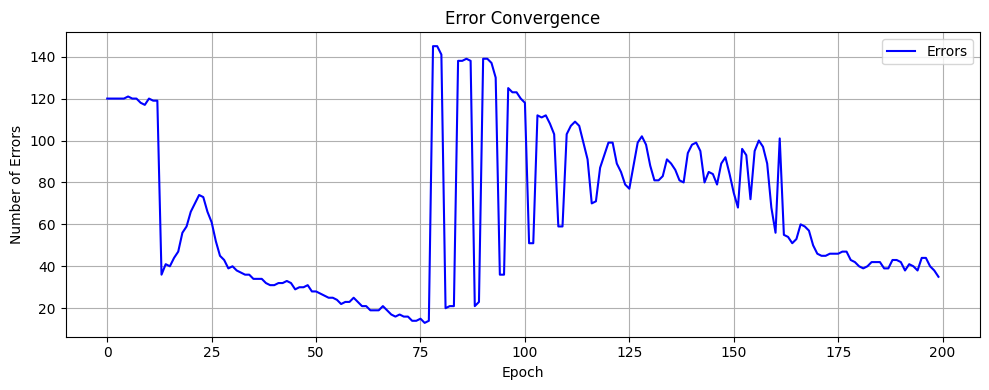

In [26]:
model = OptimizedPyTorchGradientSMPA(
    learning_rate=0.01,
    epochs=200,
    n_control_points=8,
    spline_type='pchip',
    device='cpu',  # Will use GPU if available
    track_history=True,
    random_state = 44,
    decay_factor=0.99
)

# Train model
model.fit(X_train_reordered, y_train)

model.plot_convergence()

In [27]:
from sklearn.metrics import f1_score

score = model.score(X_test_reordered, y_test)
print(score)
f1 = f1_score(y_test, model.predict(X_test_reordered))
print(f1)
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(X_test_reordered)))
cr = classification_report(y_test, model.predict(X_test_reordered))

0.675
0.3157894736842105
              precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.30      0.33      0.32         9

    accuracy                           0.68        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.69      0.68      0.68        40



In [28]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [29]:
param_grid = {
                'learning_rate': [0.01, 0.001, 0.02, 0.00001],           # Range to balance step size
                'epochs': [300],                         # Enough iterations to converge
                'n_control_points': [5, 8, 9, 15, 20],              # More points to capture wiggles
                'spline_type': ['pchip','cubic'],            # Test both spline types
                'patience': [15],                             # Fixed patience for consistency
                'decay_factor': [0.99],                        # Fixed decay for simplicity
                'min_learning_rate': [1.e-6],
                'smoothing_factor': [0.00000001, 0.000001]

}
smpa = OptimizedPyTorchGradientSMPA(random_state=12, track_history=True, device='cpu')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
grid_search = GridSearchCV(smpa, param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=3)
grid_search.fit(X_train_reordered, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 2/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-08, spline_type=pchip;, score=0.429 total time=   7.6s
[CV 1/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-08, spline_type=pchip;, score=0.500 total time=  15.9s
[CV 2/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-06, spline_type=pchip;, score=0.400 total time=  17.6s
[CV 1/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-06, spline_type=pchip;, score=0.421 total time=  19.2s
[CV 3/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-08, spli

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=OptimizedPyTorchGradientSMPA(device='cpu',
                                                    random_state=12,
                                                    track_history=True),
             n_jobs=-1,
             param_grid={'decay_factor': [0.99], 'epochs': [300],
                         'learning_rate': [0.01, 0.001, 0.02, 1e-05],
                         'min_learning_rate': [1e-06],
                         'n_control_points': [5, 8, 9, 15, 20],
                         'patience': [15], 'smoothing_factor': [1e-08, 1e-06],
                         'spline_type': ['pchip', 'cubic']},
             scoring='f1', verbose=3)

Classification report 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        31
           1       0.22      0.22      0.22         9

    accuracy                           0.65        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.65      0.65      0.65        40

Best CV score:  0.489766081871345


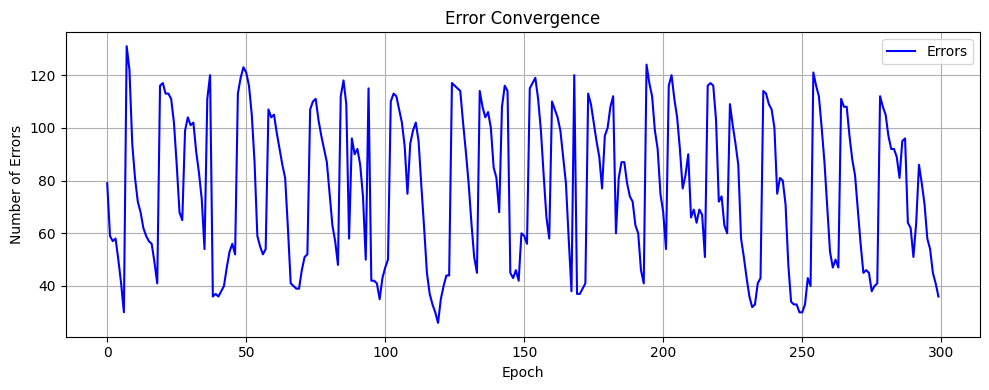

In [30]:
cr = classification_report(y_test, grid_search.best_estimator_.predict(X_test_reordered))
print("Classification report \n", cr)
print("Best CV score: ", grid_search.best_score_)

fig = grid_search.best_estimator_.plot_convergence()
plt.show()

In [31]:
grid_search.best_params_

{'decay_factor': 0.99,
 'epochs': 300,
 'learning_rate': 0.01,
 'min_learning_rate': 1e-06,
 'n_control_points': 20,
 'patience': 15,
 'smoothing_factor': 1e-08,
 'spline_type': 'cubic'}

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def plot_spline_pairs(model, X, y, feature_names=None, figsize=(12, 8)):
    """
    Plot feature vs. target feature with fitted splines for an OptimizedPyTorchGradientSMPA model.

    Parameters:
    - model: Trained OptimizedPyTorchGradientSMPA instance
    - X: Input data (numpy array or torch tensor), shape [n_samples, n_features]
    - y: Target labels (numpy array or torch tensor), shape [n_samples]
    - feature_names: Optional list of feature names for labeling (length n_features)
    - figsize: Tuple for figure size (width, height)
    """
    # Convert inputs to numpy for plotting
    if isinstance(X, torch.Tensor):
        X = X.cpu().detach().numpy()
    if isinstance(y, torch.Tensor):
        y = y.cpu().detach().numpy()

    n_features = X.shape[1]
    target_idx = n_features - 1
    n_plots = n_features - 1

    # Diagnostic: Print min/max of each feature
    print("Feature ranges in X passed to plot_spline_pairs:")
    for i in range(n_features):
        print(f"{'Target' if i == target_idx else f'Feature {i}'}: "
              f"min={X[:, i].min():.2f}, max={X[:, i].max():.2f}")

    # Set up figure
    rows = int(np.ceil(n_plots / 2))
    cols = min(2, n_plots)
    fig, axes = plt.subplots(rows, cols, figsize=figsize, squeeze=False)
    axes = axes.flatten()

    # Default feature names if none provided
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(n_features)]

    # Move spline models to CPU for evaluation
    model_device = model.device
    for spline in model.spline_models:
        spline.to('cpu')

    for i in range(n_plots):
        ax = axes[i]
        feature = X[:, i]
        target = X[:, target_idx]

        # Scatter plot: feature vs. target, colored by class
        scatter = ax.scatter(feature, target, c=y, cmap='viridis', alpha=0.6)
        plt.colorbar(scatter, ax=ax, label='Class')

        # Generate points for spline evaluation (in standardized scale)
        x_range = np.linspace(feature.min(), feature.max(), 200)
        x_tensor = torch.tensor(x_range, dtype=torch.float32)

        # Evaluate the spline
        spline_output = model.spline_models[i](x_tensor).detach().numpy()

        # Plot the spline
        ax.plot(x_range, spline_output, 'r-', label='Fitted Spline', linewidth=2)

        # Reference line
        ax.axhline(0, color='k', linestyle='--', alpha=0.3, label='Zero Line')

        # Labeling
        ax.set_xlabel(feature_names[i])
        ax.set_ylabel(feature_names[target_idx])
        ax.set_title(f'{feature_names[i]} vs. {feature_names[target_idx]}')
        ax.legend()

    # Hide unused subplots
    for j in range(n_plots, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    # Restore spline models to original device
    for spline in model.spline_models:
        spline.to(model_device)

Feature ranges in X passed to plot_spline_pairs:
Feature 0: min=-1.34, max=2.20
Feature 1: min=-2.07, max=3.09
Feature 2: min=-2.67, max=4.03
Feature 3: min=-2.03, max=3.12
Feature 4: min=-1.74, max=3.59
Feature 5: min=-2.00, max=3.43
Feature 6: min=-1.90, max=3.29
Feature 7: min=-1.88, max=3.77
Feature 8: min=-1.97, max=3.32
Feature 9: min=-2.18, max=3.98
Feature 10: min=-1.74, max=4.90
Feature 11: min=-1.31, max=3.87
Feature 12: min=-1.64, max=3.86
Feature 13: min=-1.45, max=4.12
Feature 14: min=-1.19, max=4.99
Feature 15: min=-1.27, max=7.80
Feature 16: min=-1.24, max=5.59
Feature 17: min=-1.40, max=4.79
Feature 18: min=-1.83, max=4.45
Feature 19: min=-1.28, max=3.95
Feature 20: min=-1.46, max=4.29
Feature 21: min=-1.90, max=3.19
Feature 22: min=-2.24, max=3.04
Feature 23: min=-1.88, max=3.06
Feature 24: min=-1.51, max=4.06
Feature 25: min=-2.47, max=3.66
Feature 26: min=-1.93, max=3.59
Feature 27: min=-2.38, max=4.23
Feature 28: min=-3.31, max=2.44
Feature 29: min=-2.14, max=4.46
F

/tmp/ipykernel_4973/2464400002.py:79: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


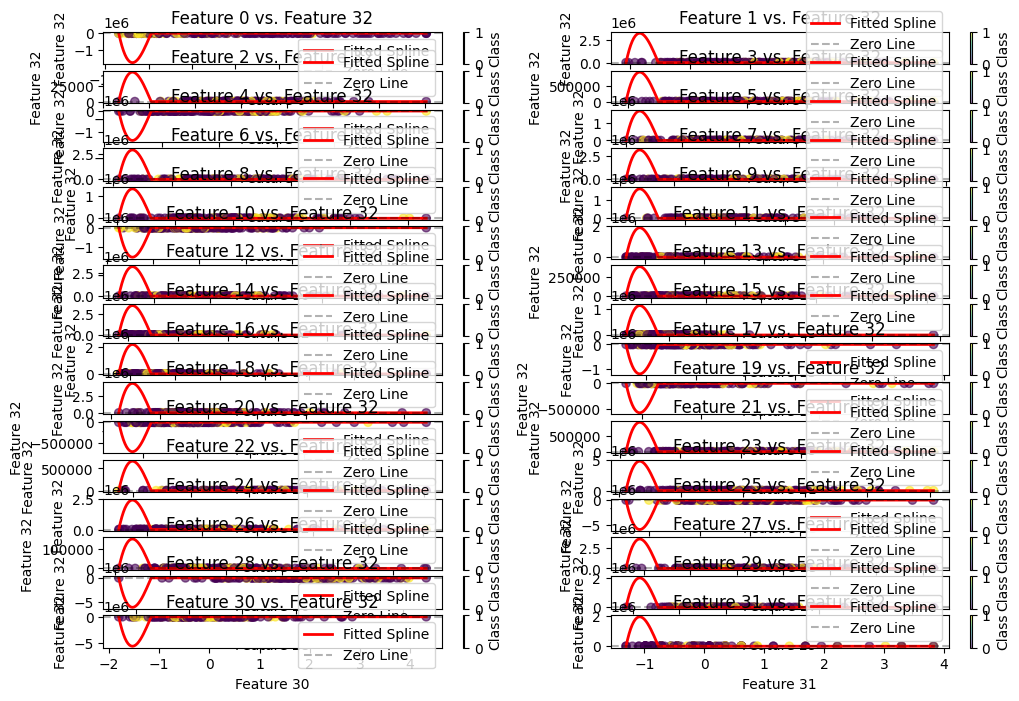

In [33]:
plot_spline_pairs(grid_search.best_estimator_, X_train_reordered, y_train)